<a href="https://www.kaggle.com/code/priyankamukulsharma/insurance-premium-prediction-linearregression?scriptVersionId=94143167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


# # **Checking the data description, missing values and null values** # # 

In [2]:
dataset=pd.read_csv("../input/insurance/insurance.csv")


In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.shape

(1338, 7)

In [6]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
pd.get_dummies(dataset)

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


In [8]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


# **Visualise distribution**

We have 3 categorial data and 4 numerical data.  
1. Categorial data: [sex,smoker,region]   
2. Numerical data: [age,bmi,children,expenses]



# **Categorical variables:** We will use the below graphs for the categorial variables

1. sns.countplot
2. sns.catplot 


In [9]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'Sex value counts')

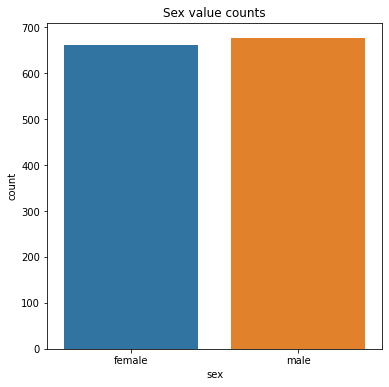

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(dataset['sex'])
plt.title('Sex value counts')

In [11]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Smoker value count')

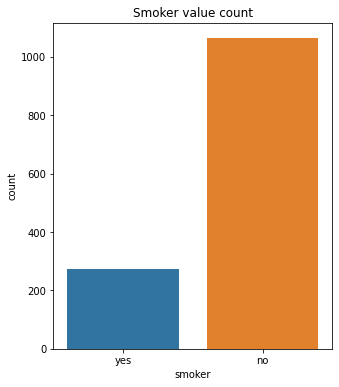

In [12]:
plt.figure(figsize=(5,6))
sns.countplot(dataset['smoker'])
plt.title('Smoker value count')

In [13]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Region value count')

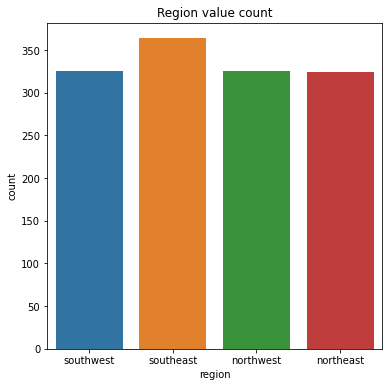

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(dataset['region'])
plt.title('Region value count')

#  Factor plot allow us to further breakdown categorial variable using another categorial variable 

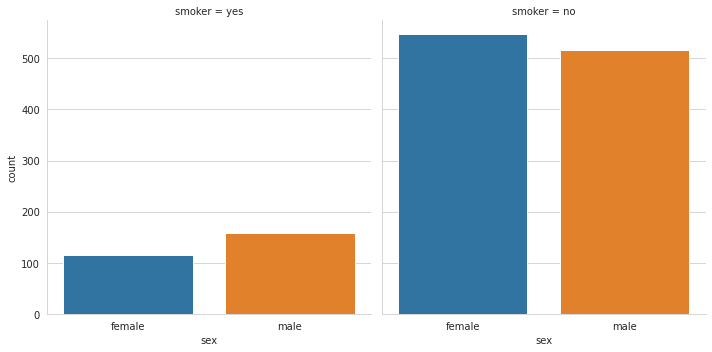

In [15]:
sns.set_style("whitegrid")
sns.catplot(x='sex', col='smoker',data=dataset,kind='count')


# ** Fitting the linear model**

In [16]:
# First creating the features  and the labels dataset.

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1].values

X,y

(      age     sex   bmi  children smoker     region
 0      19  female  27.9         0    yes  southwest
 1      18    male  33.8         1     no  southeast
 2      28    male  33.0         3     no  southeast
 3      33    male  22.7         0     no  northwest
 4      32    male  28.9         0     no  northwest
 ...   ...     ...   ...       ...    ...        ...
 1333   50    male  31.0         3     no  northwest
 1334   18  female  31.9         0     no  northeast
 1335   18  female  36.9         0     no  southeast
 1336   21  female  25.8         0     no  southwest
 1337   61  female  29.1         0    yes  northwest
 
 [1338 rows x 6 columns],
 array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36]))

In [17]:
y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [18]:
#Trying one hot encoding with pandas get_dummies() method
X_features=pd.get_dummies(X).values
X_features

array([[19. , 27.9,  0. , ...,  0. ,  0. ,  1. ],
       [18. , 33.8,  1. , ...,  0. ,  1. ,  0. ],
       [28. , 33. ,  3. , ...,  0. ,  1. ,  0. ],
       ...,
       [18. , 36.9,  0. , ...,  0. ,  1. ,  0. ],
       [21. , 25.8,  0. , ...,  0. ,  0. ,  1. ],
       [61. , 29.1,  0. , ...,  1. ,  0. ,  0. ]])

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y,test_size=0.2,random_state=42)
X_train

array([[46. , 20. ,  2. , ...,  1. ,  0. ,  0. ],
       [47. , 24.3,  0. , ...,  0. ,  0. ,  0. ],
       [52. , 24.9,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [58. , 25.2,  0. , ...,  0. ,  0. ,  0. ],
       [37. , 47.6,  2. , ...,  0. ,  0. ,  1. ],
       [55. , 29.9,  0. , ...,  0. ,  0. ,  1. ]])

In [20]:
X_test


array([[45. , 25.2,  2. , ...,  0. ,  0. ,  0. ],
       [36. , 30. ,  0. , ...,  1. ,  0. ,  0. ],
       [64. , 26.9,  0. , ...,  1. ,  0. ,  0. ],
       ...,
       [38. , 28. ,  1. , ...,  0. ,  0. ,  0. ],
       [54. , 47.4,  0. , ...,  0. ,  1. ,  0. ],
       [51. , 34.2,  1. , ...,  0. ,  0. ,  1. ]])

In [21]:
y_test

array([ 9095.07,  5272.18, 29330.98,  9301.89, 33750.29,  4536.26,
        2117.34, 14210.54,  3732.63, 10264.44, 18259.22,  7256.72,
        3947.41, 46151.12, 48673.56, 44202.65,  9800.89, 42969.85,
        8233.1 , 21774.32,  5080.1 ,  7441.5 ,  1256.3 ,  2755.02,
       11085.59, 10923.93, 12644.59, 18804.75,  9715.84,  1131.51,
       15828.82, 11842.62,  2020.55,  5693.43,  2904.09,  7448.4 ,
        2597.78,  7337.75, 23887.66, 38709.18,  4687.8 ,  2643.27,
       11674.13, 12124.99,  4890.  , 12333.83,  3579.83,  4391.65,
       42124.52,  4463.21, 13887.2 ,  1719.44, 28476.73,  1708.93,
       10594.23, 25333.33,  3645.09, 38746.36, 11848.14, 10564.88,
       13880.95,  4753.64, 27941.29,  8017.06, 23045.57,  4133.64,
       17942.11, 25992.82,  3594.17,  1682.6 ,  6079.67,  9411.01,
        8283.68,  6338.08,  7152.67,  4889.04,  4846.92, 11454.02,
        4349.46,  9101.8 ,  1391.53, 28101.33,  5152.13, 38511.63,
       44501.4 , 41097.16,  4837.58, 10601.63,  8310.84, 11264

**# Fitting the model.**

In [22]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# ** Predictng with the fitted model**

In [23]:
y_pred=lr.predict(X_test)
print(y_pred)
len(y_pred)

[ 8976.76760964  7061.47078348 36861.00837958  9439.16742899
 26965.82783567 10866.56613365   163.68342867 16902.1625389
  1092.78891435 11221.84972563 28100.81510083  9381.37647426
  5265.11298425 38433.51445836 40248.06655201 37084.37888675
 15248.12984097 35901.53286407  9127.45708271 31464.93323459
  3848.37001706 10130.91497172  2370.69195712  7139.66129952
 11294.96254187 12967.62453886 14509.58195129  6160.69986604
  9962.85959031  2163.07205222  9116.85372521 13064.63457975
  4571.36274084  3423.94442545  4460.1164586  13031.12862237
  1979.67910034  8813.16035987 33258.81811961 32584.31750912
  3910.32992482  4343.38905053 14143.48952085 11435.21647816
  8791.14158849 12096.4844327   5272.59144805  3150.51559564
 35504.10915377  9154.13549953 15835.69309292  2352.62339682
 12359.83078765  1472.69854255 13377.66583865 12570.20082856
  4353.80717022 32169.40215637 13321.12708687 12913.03146333
 14167.45396849 10500.87520372 16362.21376975  7768.13192586
 11846.62396902  4048.651

268

In [24]:
print(y_pred.transpose)

<built-in method transpose of numpy.ndarray object at 0x7f9110cf0db0>


In [25]:
y_pred.dtype
y_new=np.array(y_pred)
print(np.array(y_pred))
y_new.dtype

[ 8976.76760964  7061.47078348 36861.00837958  9439.16742899
 26965.82783567 10866.56613365   163.68342867 16902.1625389
  1092.78891435 11221.84972563 28100.81510083  9381.37647426
  5265.11298425 38433.51445836 40248.06655201 37084.37888675
 15248.12984097 35901.53286407  9127.45708271 31464.93323459
  3848.37001706 10130.91497172  2370.69195712  7139.66129952
 11294.96254187 12967.62453886 14509.58195129  6160.69986604
  9962.85959031  2163.07205222  9116.85372521 13064.63457975
  4571.36274084  3423.94442545  4460.1164586  13031.12862237
  1979.67910034  8813.16035987 33258.81811961 32584.31750912
  3910.32992482  4343.38905053 14143.48952085 11435.21647816
  8791.14158849 12096.4844327   5272.59144805  3150.51559564
 35504.10915377  9154.13549953 15835.69309292  2352.62339682
 12359.83078765  1472.69854255 13377.66583865 12570.20082856
  4353.80717022 32169.40215637 13321.12708687 12913.03146333
 14167.45396849 10500.87520372 16362.21376975  7768.13192586
 11846.62396902  4048.651

dtype('float64')

In [26]:
%config Completer.use_jedi = False

In [27]:
y_test.dtype
y_old=np.array(y_test)
y_old

array([ 9095.07,  5272.18, 29330.98,  9301.89, 33750.29,  4536.26,
        2117.34, 14210.54,  3732.63, 10264.44, 18259.22,  7256.72,
        3947.41, 46151.12, 48673.56, 44202.65,  9800.89, 42969.85,
        8233.1 , 21774.32,  5080.1 ,  7441.5 ,  1256.3 ,  2755.02,
       11085.59, 10923.93, 12644.59, 18804.75,  9715.84,  1131.51,
       15828.82, 11842.62,  2020.55,  5693.43,  2904.09,  7448.4 ,
        2597.78,  7337.75, 23887.66, 38709.18,  4687.8 ,  2643.27,
       11674.13, 12124.99,  4890.  , 12333.83,  3579.83,  4391.65,
       42124.52,  4463.21, 13887.2 ,  1719.44, 28476.73,  1708.93,
       10594.23, 25333.33,  3645.09, 38746.36, 11848.14, 10564.88,
       13880.95,  4753.64, 27941.29,  8017.06, 23045.57,  4133.64,
       17942.11, 25992.82,  3594.17,  1682.6 ,  6079.67,  9411.01,
        8283.68,  6338.08,  7152.67,  4889.04,  4846.92, 11454.02,
        4349.46,  9101.8 ,  1391.53, 28101.33,  5152.13, 38511.63,
       44501.4 , 41097.16,  4837.58, 10601.63,  8310.84, 11264

# ** Comparing the actual expenses and the predicted expenses**

In [28]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 8976.77  9095.07]
 [ 7061.47  5272.18]
 [36861.01 29330.98]
 [ 9439.17  9301.89]
 [26965.83 33750.29]
 [10866.57  4536.26]
 [  163.68  2117.34]
 [16902.16 14210.54]
 [ 1092.79  3732.63]
 [11221.85 10264.44]
 [28100.82 18259.22]
 [ 9381.38  7256.72]
 [ 5265.11  3947.41]
 [38433.51 46151.12]
 [40248.07 48673.56]
 [37084.38 44202.65]
 [15248.13  9800.89]
 [35901.53 42969.85]
 [ 9127.46  8233.1 ]
 [31464.93 21774.32]
 [ 3848.37  5080.1 ]
 [10130.91  7441.5 ]
 [ 2370.69  1256.3 ]
 [ 7139.66  2755.02]
 [11294.96 11085.59]
 [12967.62 10923.93]
 [14509.58 12644.59]
 [ 6160.7  18804.75]
 [ 9962.86  9715.84]
 [ 2163.07  1131.51]
 [ 9116.85 15828.82]
 [13064.63 11842.62]
 [ 4571.36  2020.55]
 [ 3423.94  5693.43]
 [ 4460.12  2904.09]
 [13031.13  7448.4 ]
 [ 1979.68  2597.78]
 [ 8813.16  7337.75]
 [33258.82 23887.66]
 [32584.32 38709.18]
 [ 3910.33  4687.8 ]
 [ 4343.39  2643.27]
 [14143.49 11674.13]
 [11435.22 12124.99]
 [ 8791.14  4890.  ]
 [12096.48 12333.83]
 [ 5272.59  3579.83]
 [ 3150.52  4

Evaluating the accuracy of the model.

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
 mean_absolute_error(y_test,y_pred),
 mean_squared_error(y_test,y_pred),
r2_score(y_test,y_pred)

0.7835726930039905

# **Using GridCV and regularization**

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# Create a function to display the cross val score

def display_cv_score(model):
    scores=cross_val_score(model,
                   X_train,
                   y_train,
                   cv=5,
                   scoring='r2')
    print(scores)
    print('CV means: ', np.mean(scores))
    print('STD:',np.std(scores))
    

In [33]:
display_cv_score(lr)

[0.72 0.8  0.72 0.66 0.77]
CV means:  0.7331310280462238
STD: 0.04890784276052091


# It has R2 value of 0.73. Lets try ridge regression to see if we can improve it further.

In [34]:
from sklearn.linear_model import Ridge

In [35]:
#train the model with alpha=1

ridge=Ridge(alpha=1).fit(X_train,y_train)
display_cv_score(ridge)

[0.72 0.8  0.72 0.66 0.77]
CV means:  0.7331582683660033
STD: 0.04872010359985911


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:

parameters={'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid=GridSearchCV(estimator=ridge,
                  param_grid=parameters,
                  scoring='r2',
                  cv=5
                 )
grid_result=grid.fit(X_train,y_train)  

print("Best parameter:" , grid_result.best_params_)
print("Best Score:", grid_result.best_score_)
grid_result

Best parameter: {'alpha': 1}
Best Score: 0.7331582683660033


GridSearchCV(cv=5, estimator=Ridge(alpha=1),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

# *Trying the lasso regression

In [38]:
from sklearn.linear_model import Lasso

In [39]:
lasso=Lasso(alpha=1).fit(X_train,y_train)

In [40]:
display_cv_score(lasso)

[0.72 0.8  0.72 0.66 0.77]
CV means:  0.7331595432461817
STD: 0.04888418071694432


In [41]:
parameters={'alpha': [0.001,0.01,0.1,1,10,100,1000]}
lasso_grid=GridSearchCV(estimator=lasso,
                        param_grid=parameters,
                        cv=5,
                        scoring='r2'
                       )
lasso_grid.fit(X_train,y_train)
print(lasso_grid.best_params_)
print(lasso_grid.best_score_)



{'alpha': 100}
0.7343127688607234


In [42]:
dir(lasso_grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

# **Conclusion. The Linear Regression does not have the highest accuracy. In next notebook lets look at Polynomial regression and compare it with this linear algorithm.**